## Code for the evaluation of the simulation results

Calculate the Energy Demand 
Calculate the MAE 

In [121]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [122]:
# Loop over the data in SimStadt 
# SimStadt\Mierendorff_2020
results_2020 = r'SimStadt\Mierendorff_2020.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step'

# SimStadt\Mierendorff_2021
results_2021 = r'SimStadt\Mierendorff_2021.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step'

# SimStadt\Mierendorff_2022
results_2022 = r'SimStadt\Mierendorff_2022.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step'

# Hourly results 2020
hourly_results_2020 = r'SimStadt\Mierendorff_2020.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step\a.step'


# Hourly results 2021
hourly_results_2021 = r'SimStadt\Mierendorff_2021.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step\a.step'

# Hourly results 2022
hourly_results_2022 = r'SimStadt\Mierendorff_2022.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step\a.step'


In [123]:
# get all results files in the folder
files = []
df = pd.DataFrame()
for file in os.listdir(results_2020):
    if file.endswith('.csv'):
        files.append(os.path.join(results_2020, file))


skiprows = list(range(0, 19)) + [20]

# read all files into a pandas dataframe
df_18599 = pd.concat((pd.read_csv(file,  skiprows=skiprows,  sep=';', decimal=",") for file in files), ignore_index=True)

df_18599.head()

,GMLId,ParentGMLId,Latitude,Longitude,X-coordinate,Y-coordinate,LOD,Year of construction,Year of refurbishment,Refurbishment Variant,...,March Heating Demand,April Heating Demand,May Heating Demand,June Heating Demand,July Heating Demand,August Heating Demand,September Heating Demand,October Heating Demand,November Heating Demand,December Heating Demand
0,DEBE3DeVro4Xquwj,DEBE3D04YY50000Pqq,52.52602,13.29950,384637.20,5820905.42,LOD2,1905,NaN,Original,...,20040,6138,885,9,0,0,1753,12966,27121,38549
1,DEBE3DqljAotc5Mc,DEBE3D04YY50000JNV,52.52465,13.30034,384690.78,5820751.39,LOD2,1905,NaN,Original,...,4968,812,45,0,0,0,124,3356,9028,13768
2,DEBE3DSlz3JV8rPT,DEBE3D04YY50000Ncz,52.52392,13.30058,384705.24,5820669.45,LOD2,1905,NaN,Original,...,7751,2459,401,2,0,0,538,4810,11046,16462
3,DEBE3DNvy8Mr4hpJ,DEBE3D04YY500006oB,52.52250,13.30168,384776.17,5820510.11,LOD2,1905,NaN,Original,...,9051,1895,102,0,0,0,390,5742,13052,18632
4,DEBE3DOgQzlAY1Lv,DEBE3D04YY50000G12,52.52498,13.29933,384623.02,5820789.65,LOD2,1905,NaN,Original,...,3464,1082,169,2,0,0,277,2190,4654,6706


In [124]:
df_18599.columns

Index(['GMLId', 'ParentGMLId', 'Latitude', 'Longitude', 'X-coordinate',
       'Y-coordinate', 'LOD', 'Year of construction', 'Year of refurbishment',
       'Refurbishment Variant', 'ALKIS code', 'PrimaryUsageZoneType',
       'PrimaryUsageZoneArea', 'SecondaryUsageZoneType',
       'SecondaryUsageZoneArea', 'BuildingType', 'Footprint area',
       'Total wall thermal area above ground',
       'Total wall thermal area below ground', 'Total outwall area',
       'Total sharedwall area', 'Total roof area', 'Gross volume',
       'Is Gross volume approximated?', 'Heated volume', 'Ridge/mean Height',
       'Eaves/mean Height', 'Storey number', 'Average Storey Height',
       'Number of households', 'Number of occupants', 'Attic Heating',
       'Basement Heating', 'Basement ceiling height above ground',
       'Surface area to volume ratio', 'Heated area', 'Mean Uvalue',
       'Specific domestic hot water demand', 'Specific space heating demand',
       'Total Yearly Heat+DHW demand', 

In [125]:
# Total footprint area
print("The total footprint area is: ", df_18599['Footprint area'].sum())



The total footprint area is:  206550.40000000002


In [126]:
# The specific space heating deamnd is 
df_18599['Specific space heating demand'].sum() 
# The domesitc hotwater deamnd is
#df['Specific domestic hot water demand'].sum() / df['Footprint area'].sum()



125969.5

In [127]:
hourly_files = [os.path.join(hourly_results_2020, file) for file in os.listdir(hourly_results_2020) if file.endswith('.prn')]

df = pd.concat((pd.read_csv(file, 
                            sep='\t',  
                            skiprows=[0, 1],  # Skip the first two rows (header)
                            names=['Hour of the Year', 'Heat_Demand', 'Load_Duration_Curve'],  # Column names
                            encoding='utf-8',  
                            na_values=['NaN']) for file in hourly_files), 
               ignore_index=True)
  
df.head()

,Hour of the Year,Heat_Demand,Load_Duration_Curve
0,1,2.0,9.6
1,2,2.2,9.6
2,3,2.4,9.5
3,4,2.4,9.4
4,5,2.5,9.3


In [128]:
# Now get the data for block wise comparison
# Get the relevant blocks at the innner mierendorff Insel
# Load Block level data 
block_data = gpd.read_file(r'auxillary\00_block_shape.shp')
outer_mierendorff = ["019609", "019017", "019808", "019901", "020902", "019708"]
block_data['blknr'] = block_data["blknr"].astype(str)
block_data = block_data[~block_data["blknr"].isin(outer_mierendorff)]

In [129]:
# Load Measured Data for electricity
elec_data = pd.read_excel(r'auxillary\Elec_Berlin_2020_2022.xls')
gas_data = pd.read_excel(r'auxillary\Gas_Berlin_2020_2022.xls')
dh_data = pd.read_excel(r'auxillary\DH_Berlin_2020_2022.xls')
block_data["blknr"] = block_data["blknr"].astype(int)   
block_data.head()

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5..."
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5..."
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5..."
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5..."
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5..."


In [130]:
# Load file for checking which gml files belongs to which block
block_gml = pd.read_csv(r'auxillary\buildings_and_building_parts.csv')
block_gml.head()

,geometry,coordinates,gml_id,building_part_id,index_right,blknr,bez,bezname,plr,blktypname,ewk,area,datum
0,POLYGON ((190173.32861862011 173162.3613194087...,"[[384976.272, 5820790.551, 32.65], [384977.076...",DEBE3D04YY50000BlO,NaN,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,819.436562,1994/06/01 00:00:00.000
1,POLYGON ((190209.72002693682 173191.6674380649...,"[[385014.416, 5820817.572, 32.036], [385016.05...",DEBE3D04YY50000QXO,NaN,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,173.937359,1994/06/01 00:00:00.000
2,POLYGON ((190209.72002693682 173191.6674380649...,"[[385014.416, 5820817.572, 32.036], [385016.05...",DEBE3D04YY50000QXO,DEBE3DPcFE8lkbYV,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,173.937359,1994/06/01 00:00:00.000
3,POLYGON ((190229.7310809504 173193.26077722237...,"[[385034.496, 5820817.93, 32.036], [385034.49,...",DEBE3D04YY50000QXO,DEBE3DpnBYcjfpwT,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,30.939735,1994/06/01 00:00:00.000
4,POLYGON ((190219.01940630068 173206.1636086045...,"[[385024.595, 5820831.474, 32.036], [385016.24...",DEBE3D04YY50000QXO,DEBE3DwERcC6Wilv,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,142.857381,1994/06/01 00:00:00.000


In [131]:
# Get block number by checking if gml_id or parnet_gml_id matches gml_id of block_gml

df_18599['Specific domestic hot water demand'] = pd.to_numeric(df_18599['Specific domestic hot water demand'], errors="coerce")
df_18599['Specific space heating demand'] = pd.to_numeric(df_18599["Specific space heating demand"], errors='coerce')

for blk in block_data["blknr"]:
    gml_ids = block_gml[block_gml["blknr"] == blk]["gml_id"].values
    block_data.loc[block_data["blknr"] == blk, "18599 Heating Demand"] = df_18599[df_18599["ParentGMLId"].isin(gml_ids)]['Specific space heating demand'].sum()
    block_data.loc[block_data["blknr"] == blk, "18599 DHW Demand"]  = df_18599[df_18599["ParentGMLId"].isin(gml_ids)]['Specific domestic hot water demand'].sum()

In [132]:
block_data["18599 Heating Demand"]

1         0.0
3         0.0
5      9636.4
6         0.0
7         0.0
9         0.0
10        0.0
11      408.4
12      583.2
13     4551.5
14        0.0
15     5762.8
16     1058.7
17      463.8
18     3838.6
19     2890.4
20        0.0
21     6175.6
22     4176.0
23     4360.9
24     7683.4
25     8452.6
26     6246.1
27     3946.7
28     2327.6
29    11145.6
30     4504.3
31        0.0
32        0.0
33     7960.8
34      887.8
35     1039.6
36     1235.4
37     4932.9
38     2119.9
39      437.1
40     2287.8
42     2413.8
43     2908.5
44        0.0
Name: 18599 Heating Demand, dtype: float64

In [133]:
dh_data = dh_data.rename(columns={"Blocknummer": "blknr"})
dh_data_shapes = block_data.merge(dh_data, on='blknr', how='left')
elec_data = elec_data.rename(columns={"Blocknummer": "blknr"})  
elec_data_shapes = block_data.merge(elec_data, on='blknr', how='left')
gas_data = gas_data.rename(columns={"Blocknummer": "blknr"})
gas_data_shapes = block_data.merge(gas_data, on='blknr', how='left')

In [149]:
block_numbers = list(block_data["blknr"])
# Initialize data_dict with keys for each year and energy type
data_dict = {
    'blknr': [],
    '18599 Heating Demand 2020': [],
    '18599 Heating Demand 2021': [],
    '18599 Heating Demand 2022': [],
    '18599 DHW Demand 2020': [],
    '18599 DHW Demand 2021': [],
    '18599 DHW Demand 2022': [],
}
data_dict["blknr"] = list(block_data["blknr"])
for year in [2020, 2021, 2022]:
    path = os.path.join('SimStadt', f'Mierendorff_{year}.proj', 'i.step', 'a.step', 'a.step', 'a.step', 'a.step', 'a.step', 'a.step')
    # get all results files in the folder
    print(path)
    files = []
    df = pd.DataFrame()
    for file in os.listdir(path):
        if file.endswith('.csv'):
            files.append(os.path.join(results_2020, file))


    skiprows = list(range(0, 19)) + [20]

    # read all files into a pandas dataframe
    df_18599 = pd.concat((pd.read_csv(file,  skiprows=skiprows,  sep=';', decimal=",") for file in files), ignore_index=True)

    # Get block number by checking if gml_id or parnet_gml_id matches gml_id of block_gml

    df_18599['Specific domestic hot water demand'] = pd.to_numeric(df_18599['Specific domestic hot water demand'], errors="coerce")
    df_18599['Specific space heating demand'] = pd.to_numeric(df_18599["Specific space heating demand"], errors='coerce')
    
    for blk in block_data["blknr"]:
        gml_ids = block_gml[block_gml["blknr"] == blk]["gml_id"].values
        data_dict[f"18599 Heating Demand {year}"].append(df_18599[df_18599["ParentGMLId"].isin(gml_ids)]['Specific space heating demand'].sum())
        data_dict[f"18599 DHW Demand {year}"].append(df_18599[df_18599["ParentGMLId"].isin(gml_ids)]['Specific domestic hot water demand'].sum())



SimStadt\Mierendorff_2020.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step
SimStadt\Mierendorff_2021.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step
SimStadt\Mierendorff_2022.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step


In [157]:
# Create simulation dataframe
data_dict

simulation_data = pd.DataFrame.from_dict(data_dict)
simulation_data.head()

simulation_merged_gdf = gpd.GeoDataFrame(pd.merge(block_data, simulation_data, on='blknr', how='left'))

In [165]:
gas_columns_to_check = [
        "Gasverbrauch 2020 [MWh]",
        "Gasverbrauch 2021 [MWh]",
        "Gasverbrauch 2022 [MWh]"
    ]

for column in gas_columns_to_check:
        gas_data_shapes[column] = pd.to_numeric(gas_data_shapes[column], errors='coerce')

gas_data_shapes["valid_entries"] = gas_data_shapes[gas_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)

dh_columns_to_check = [
        "Fernwärmeverbrauch 2020 [MWh]",
        "Fernwärmeverbrauch 2021 [MWh]",
        "Fernwärmeverbrauch 2022 [MWh]"
    ]

for column in dh_columns_to_check:
        dh_data_shapes[column] = pd.to_numeric(dh_data_shapes[column], errors='coerce')


In [171]:
# Add DHW and Heating Demand
# Add Gasverbrauch and Fernwärmeverbrauch 

measured_data = pd.merge(gas_data_shapes, dh_data_shapes, on="blknr")
measured_data.loc["Heating Demand 2020"] = measured_data["Fernwärmeverbrauch 2020 [MWh]"] + measured_data["Gasverbrauch 2020 [MWh]"]
measured_data.loc["Heating Demand 2021"] = measured_data["Fernwärmeverbrauch 2021 [MWh]"] + measured_data["Gasverbrauch 2021 [MWh]"]

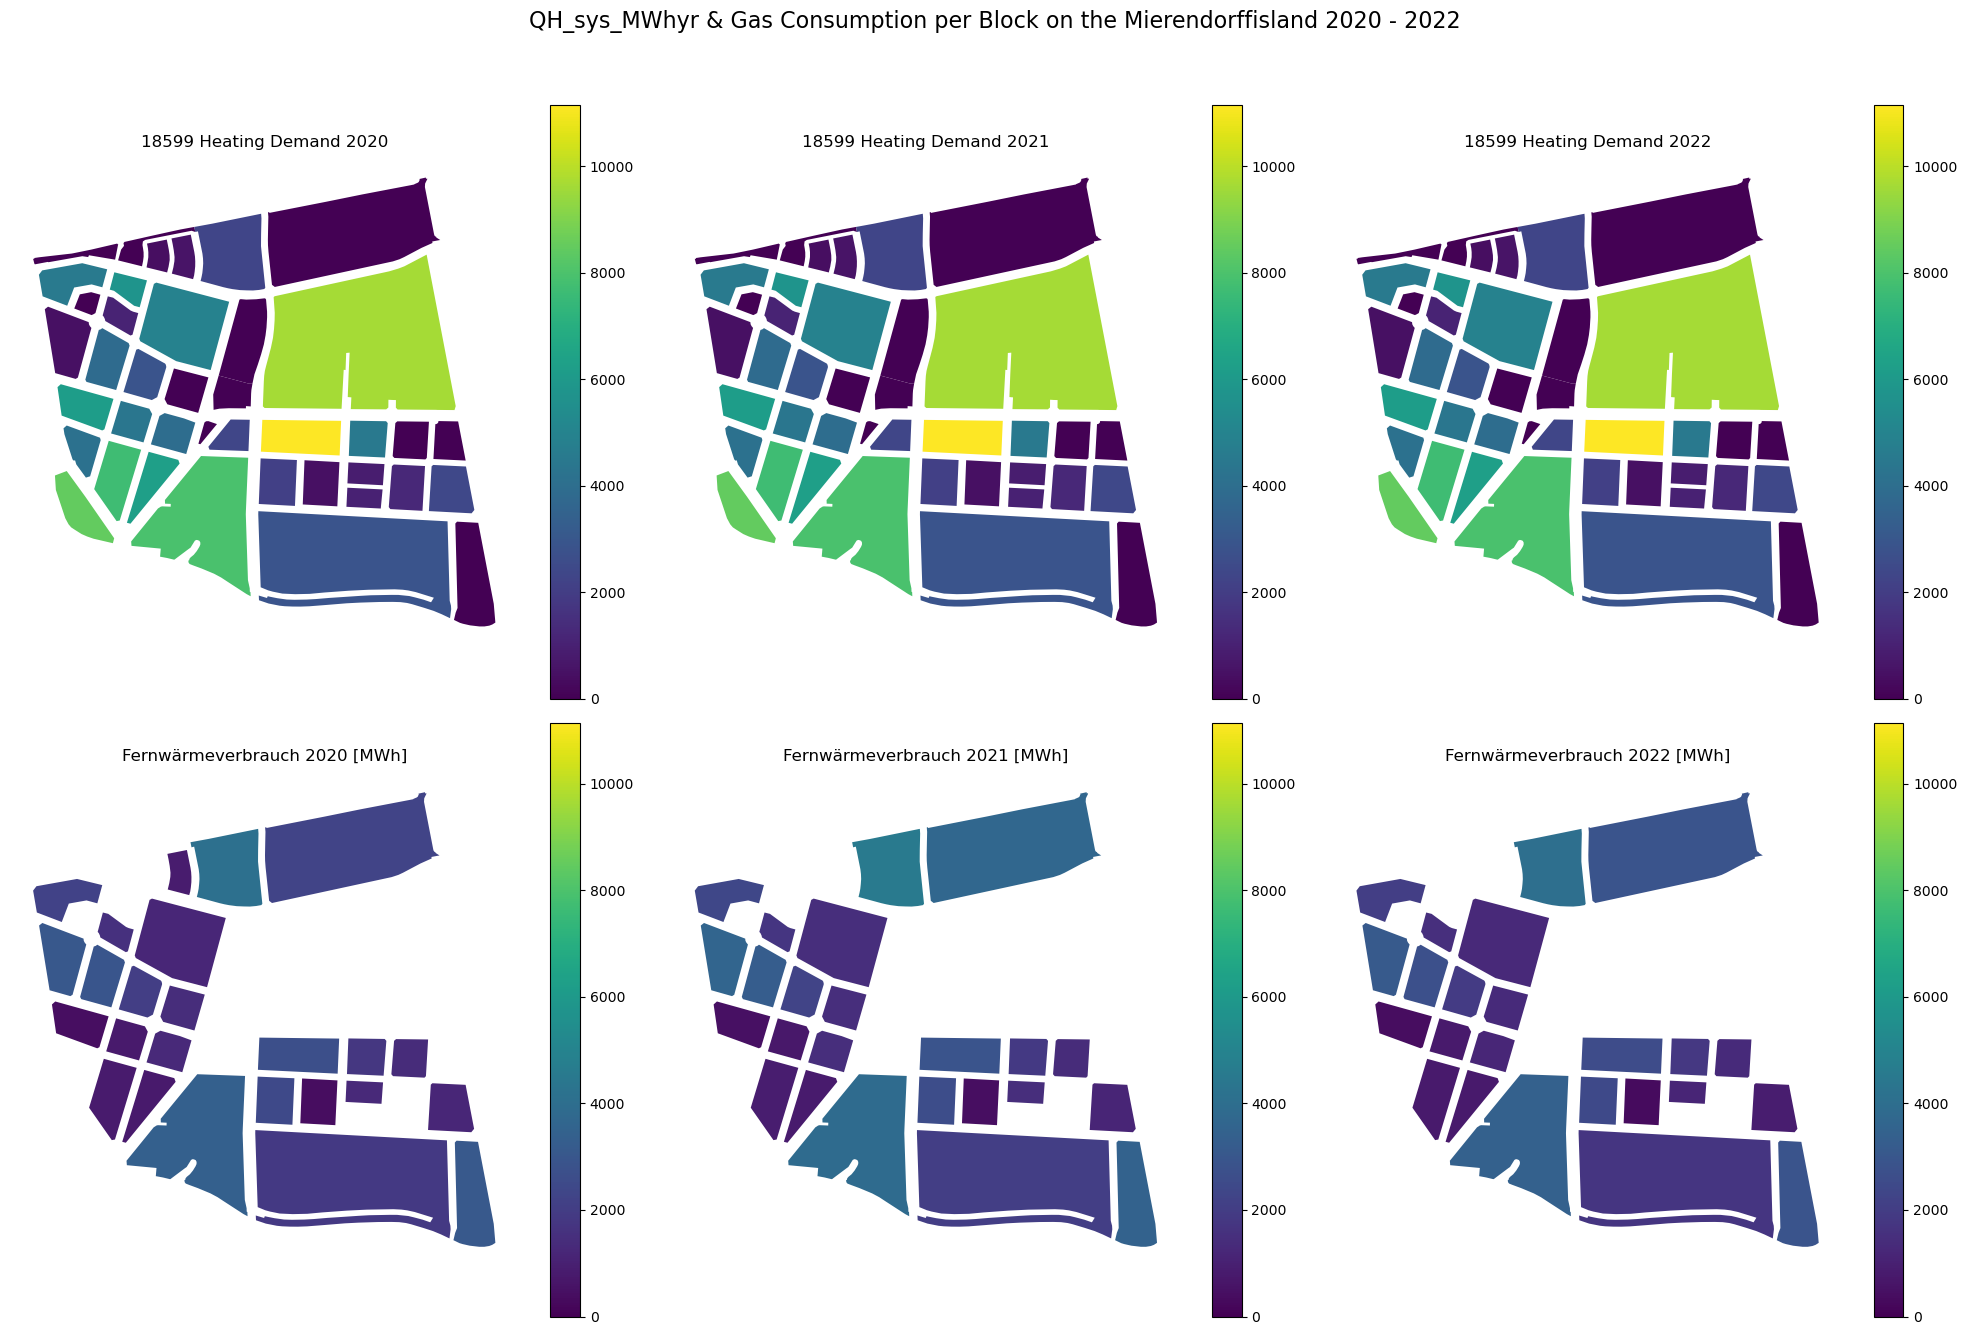

In [166]:
from matplotlib.colors import Normalize



# Assuming simulation_merged_gdf and measured_merged_gdf are defined GeoDataFrames
# Calculate vmin and vmax for normalization across all plots
vmin = min(simulation_merged_gdf[["18599 Heating Demand 2020", "18599 Heating Demand 2021", "18599 Heating Demand 2022"]].min().min(),
           dh_data_shapes[dh_columns_to_check].min().min())
vmax = max(simulation_merged_gdf[["18599 Heating Demand 2020", "18599 Heating Demand 2021", "18599 Heating Demand 2022"]].max().max(),
           dh_data_shapes[dh_columns_to_check].max().max())

# Define a normalization for the color mapping
norm = Normalize(vmin=vmin, vmax=vmax)

# Set up the figure for subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(20, 14))  # Adjusted to 2 rows


# Create the color map
cmap = plt.cm.viridis


# Plotting QH_sys_MWhyr 2020, 2021, 2022 in the first row
columns = ["18599 Heating Demand 2020", "18599 Heating Demand 2021", "18599 Heating Demand 2022"]
for i, column in enumerate(columns):
    simulation_merged_gdf.plot(column=column, ax=axs[0, i], legend=True, cmap=cmap, norm=norm)
    axs[0, i].set_title(f'{column}')
    axs[0, i].axis('off')

# Plotting gas consumption for 2020, 2021, 2022 in the second row

for i, column in enumerate(dh_columns_to_check):
    dh_data_shapes.plot(column=column, ax=axs[1, i], legend=True, cmap=cmap, norm=norm)
    axs[1, i].set_title(f'{column}')
    axs[1, i].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust space between plots

# Add a common title
fig.suptitle('QH_sys_MWhyr & Gas Consumption per Block on the Mierendorffisland 2020 - 2022', fontsize=16)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make room for the common title

In [ ]:
for year in [2020, 2021, 2022]:
    # Gas + 